In [1]:
import pybullet as pb
import pybullet_data as pbd
import time
import matplotlib.pyplot as plt

pysicsClient = pb.connect(pb.GUI)
pb.setAdditionalSearchPath(pbd.getDataPath())
pb.setGravity(0, 0, -10)

plane = pb.loadURDF('plane.urdf')
rod = pb.loadURDF('/model/rod_ring/rod.urdf', [0, 0, 0])
pb.changeDynamics(rod, -1, lateralFriction=1)
ring = pb.loadURDF('model/rod_ring/ring_48_small.urdf', [0, 0, 1.95])
pb.resetBaseVelocity(ring, [5, 0, 0])

In [2]:
v_linear = []
v_angular = []
position = []
orientation = []

for i in range(1200):
    pb.stepSimulation()
    v = pb.getBaseVelocity(ring)
    r = pb.getBasePositionAndOrientation(ring)
    v_linear.append(v[0])
    v_angular.append(v[1])
    position.append(r[0])
    orientation.append(pb.getEulerFromQuaternion(r[1]))
    time.sleep(1/240)

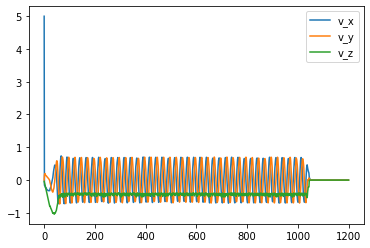

In [3]:
plt.plot([i[0] for i in v_linear])
plt.plot([i[1] for i in v_linear])
plt.plot([i[2] for i in v_linear])
plt.legend(['v_x', 'v_y', 'v_z'])
plt.show()